In [4]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
from datetime import datetime
from citipy import citipy
from config import weather_api_key

In [5]:
#starting url for weather map api call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
#create a set of random latitutde and longitude combinations
lats = np.random.uniform(low=-90.000,high=90.000,size=1500)
lngs = np.random.uniform(low=-180.000,high=180.000,size=1500)
lat_lngs=zip(lats,lngs)
lat_lngs

In [7]:
#add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [8]:
#use the tuple() funciton to display the latitude and longitude combinations
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
            citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

rikitea pf
hilo us
port alfred za
sansepolcro it
cockburn town tc
ashland us
thompson ca
kloulklubed pw
saint austell gb
fria gn
kirkenes no
cape town za
burnie au
seymchan ru
bambanglipuro id
dunedin nz
chulman ru
yellowknife ca
coahuayana mx
bluff nz
punjai puliyampatti in
kapaa us
ostrovnoy ru
rikitea pf
itacarambi br
bluff nz
mataura pf
albany au
lieksa fi
isangel vu
vaini to
avarua ck
busselton au
rikitea pf
fort nelson ca
manaure co
butaritari ki
sipoo fi
port alfred za
iqaluit ca
mys shmidta ru
xinyu cn
mahebourg mu
hithadhoo mv
pevek ru
saint-philippe re
mahebourg mu
new norfolk au
saint-augustin ca
velyka oleksandrivka ua
pimenta bueno br
albany au
saint-philippe re
salalah om
yellowknife ca
qaqortoq gl
puerto ayora ec
chuy uy
whyalla au
girua br
dikson ru
castro cl
albany au
mys shmidta ru
nabire id
cape town za
butaritari ki
port elizabeth za
busselton au
tasiilaq gl
atuona pf
hermanus za
taolanaro mg
mataura pf
karauzyak uz
sentyabrskiy ru
saleaula ws
punta arenas cl
cedral

arraial do cabo br
hermanus za
mogadishu so
kavieng pg
tomatlan mx
hermanus za
albany au
sug-aksy ru
oktyabrskoye ru
acuna mx
ushuaia ar
lardos gr
ahipara nz
stettler ca
meulaboh id
kharan pk
bluff nz
tazovskiy ru
cherskiy ru
klaksvik fo
inta ru
iqaluit ca
bredasdorp za
dikson ru
ugoofaaru mv
busselton au
mys shmidta ru
severodvinsk ru
hermanus za
lavrentiya ru
kapaa us
hilo us
chokurdakh ru
taoudenni ml
olinda br
albany au
mar del plata ar
ushuaia ar
havelock us
east london za
volpago del montello it
cape town za
alofi nu
albany au
ushuaia ar
tula mx
urumqi cn
ushuaia ar
mountain home us
katsuura jp
georgetown sh
mataura pf
mataura pf
busselton au
punta arenas cl
busselton au
new norfolk au
iranshahr ir
dikson ru
linjiang cn
hendek tr
berdigestyakh ru
aborlan ph
pevek ru
taolanaro mg
samusu ws
vaitape pf
tuktoyaktuk ca
hobart au
cape town za
santa cruz cr
samalaeulu ws
mar del plata ar
albany au
puerto ayora ec
albany au
coihaique cl
kununurra au
torbay ca
tiksi ru
lalmohan bd
busselt

In [9]:
#create a list for holding the cities
cities=[]
#identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    #if the city is unique then we will add it to the cities list
    if city not in cities:
        cities.append(city)
#print the city count to confirm sufficient count
len(cities)

626

In [10]:
#create an empty list to hold the weather data
city_data = []
#print the beginning of the logging
print("Beginning Data Retrieval    ")
print("----------------------------")

#create counters
record_count = 1
set_count = 1

#loop through all the cities in our list
for i, city in enumerate(cities):
    
    #group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i>=50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    #create endpoint url with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    #log the url, record, and set numbers and the city 
    print(f"Processing Record {record_count} of set {set_count} | {city}")
    #add 1 to the record count
    record_count += 1
    
#run an api request for each of the cities
    try:
        #parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #parse out the needed data
        city_lat=city_weather["coord"]["lat"]
        city_lng=city_weather["coord"]["lon"]
        city_max_temp=city_weather["main"]["temp_max"]
        city_humidity=city_weather["main"]["humidity"]
        city_clouds=city_weather["clouds"]["all"]
        city_wind=city_weather["wind"]["speed"]
        city_country=city_weather["sys"]["country"]
        #convert the date to ISO standard
        city_date=datetime.utcfromtimestamp(city_weather["dt"]).strftime("%Y-%m-%d %H:%M:%S")
        #append the city information into the city_data list
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
#if an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
#indicate that data loading is complete
print("----------------------------")
print("Data Retrieval Complete     ")
print("----------------------------")

Beginning Data Retrieval    
----------------------------
Processing Record 1 of set 1 | rikitea
Processing Record 2 of set 1 | hilo
Processing Record 3 of set 1 | port alfred
Processing Record 4 of set 1 | sansepolcro
Processing Record 5 of set 1 | cockburn town
Processing Record 6 of set 1 | ashland
Processing Record 7 of set 1 | thompson
Processing Record 8 of set 1 | kloulklubed
Processing Record 9 of set 1 | saint austell
Processing Record 10 of set 1 | fria
Processing Record 11 of set 1 | kirkenes
Processing Record 12 of set 1 | cape town
Processing Record 13 of set 1 | burnie
Processing Record 14 of set 1 | seymchan
Processing Record 15 of set 1 | bambanglipuro
Processing Record 16 of set 1 | dunedin
Processing Record 17 of set 1 | chulman
Processing Record 18 of set 1 | yellowknife
Processing Record 19 of set 1 | coahuayana
Processing Record 20 of set 1 | bluff
Processing Record 21 of set 1 | punjai puliyampatti
Processing Record 22 of set 1 | kapaa
Processing Record 23 of set 

Processing Record 38 of set 4 | torres
Processing Record 39 of set 4 | vila velha
Processing Record 40 of set 4 | airai
Processing Record 41 of set 4 | touros
Processing Record 42 of set 4 | yerofey pavlovich
Processing Record 43 of set 4 | leshukonskoye
Processing Record 44 of set 4 | lolua
City not found. Skipping...
Processing Record 45 of set 4 | lumphat
Processing Record 46 of set 4 | huanren
Processing Record 47 of set 4 | asau
Processing Record 48 of set 4 | andra
Processing Record 49 of set 4 | coos bay
Processing Record 50 of set 4 | srednekolymsk
Processing Record 1 of set 5 | torbay
Processing Record 2 of set 5 | karla
Processing Record 3 of set 5 | ribeira grande
Processing Record 4 of set 5 | deputatskiy
Processing Record 5 of set 5 | gravdal
Processing Record 6 of set 5 | pahalgam
Processing Record 7 of set 5 | saint-pierre
Processing Record 8 of set 5 | barentsburg
City not found. Skipping...
Processing Record 9 of set 5 | guerrero negro
Processing Record 10 of set 5 | m

Processing Record 27 of set 8 | hualmay
Processing Record 28 of set 8 | rundu
Processing Record 29 of set 8 | codrington
Processing Record 30 of set 8 | mingoyo
Processing Record 31 of set 8 | chicama
Processing Record 32 of set 8 | clarence town
Processing Record 33 of set 8 | kaka
Processing Record 34 of set 8 | yamada
Processing Record 35 of set 8 | manfredonia
Processing Record 36 of set 8 | luhyny
Processing Record 37 of set 8 | prainha
Processing Record 38 of set 8 | adrar
Processing Record 39 of set 8 | kalmar
Processing Record 40 of set 8 | tambopata
Processing Record 41 of set 8 | sola
Processing Record 42 of set 8 | saraza
Processing Record 43 of set 8 | padang
Processing Record 44 of set 8 | inongo
Processing Record 45 of set 8 | perpignan
Processing Record 46 of set 8 | hasaki
Processing Record 47 of set 8 | manakara
Processing Record 48 of set 8 | noumea
Processing Record 49 of set 8 | minot
Processing Record 50 of set 8 | aluksne
Processing Record 1 of set 9 | newtownards

Processing Record 16 of set 12 | taos
Processing Record 17 of set 12 | panji
Processing Record 18 of set 12 | maningrida
Processing Record 19 of set 12 | smolenka
Processing Record 20 of set 12 | thinadhoo
Processing Record 21 of set 12 | atar
Processing Record 22 of set 12 | atambua
Processing Record 23 of set 12 | svetlogorsk
Processing Record 24 of set 12 | ducheng
Processing Record 25 of set 12 | solnechnyy
Processing Record 26 of set 12 | puerto pinasco
City not found. Skipping...
Processing Record 27 of set 12 | las vegas
Processing Record 28 of set 12 | gayny
Processing Record 29 of set 12 | lulea
Processing Record 30 of set 12 | batemans bay
Processing Record 31 of set 12 | pathein
Processing Record 32 of set 12 | mayen
Processing Record 33 of set 12 | yibin
Processing Record 34 of set 12 | bud
Processing Record 35 of set 12 | luau
Processing Record 36 of set 12 | fizesu gherlii
Processing Record 37 of set 12 | manicore
Processing Record 38 of set 12 | hobyo
Processing Record 3

In [11]:
#convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2022-04-14 21:33:28,-23.1203,-134.9692,77.83,69,27,17.36
1,Hilo,US,2022-04-14 21:33:28,19.7297,-155.0900,82.27,77,75,8.05
2,Port Alfred,ZA,2022-04-14 21:33:29,-33.5906,26.8910,65.17,90,99,5.99
3,Sansepolcro,IT,2022-04-14 21:33:29,43.5747,12.1430,51.30,72,100,3.76
4,Cockburn Town,TC,2022-04-14 21:33:29,21.4612,-71.1419,77.54,82,20,23.15
5,Ashland,US,2022-04-14 21:28:52,40.8167,-82.2665,58.10,35,0,16.51
6,Thompson,CA,2022-04-14 21:30:14,55.7435,-97.8558,15.96,48,75,26.46
7,Kloulklubed,PW,2022-04-14 21:33:30,7.0419,134.2556,77.50,76,100,10.42
8,Saint Austell,GB,2022-04-14 21:33:30,50.3383,-4.7658,54.16,87,75,10.36
9,Fria,GN,2022-04-14 21:33:31,10.4167,-13.5833,73.22,79,47,2.95


In [12]:
#create the output file (csv)
output_data_file = "weather_data/cities.csv"
#export the city_data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
#extract relevant fields from the DataFrame for plotting
lts=city_data_df["Lat"]
max_temps=city_data_df["Max Temp"]
humidity=city_data_df["Humidity"]
cloudiness=city_data_df["Cloudiness"]
wind_speed=city_data_df["Wind Speed"]

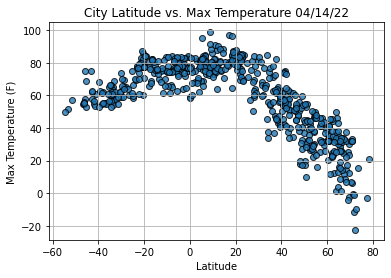

In [14]:
#get today's date in seconds
today=time.time()

#build the scatter plot for latitude vs max temperature
plt.scatter(lts, max_temps, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

#incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/Fig1.png")

#show plot
plt.show()
    

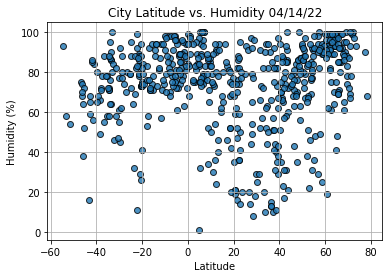

In [15]:
#build the scatter plots for latitude vs humidity
plt.scatter(lts, humidity, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

#incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity " +time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/Fig2.png")

plt.show()

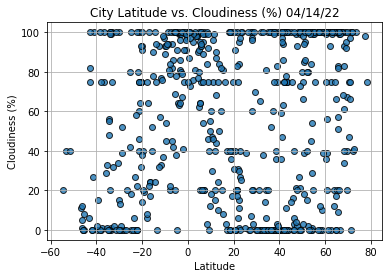

In [16]:
#build the scatter plots for latitude vs. cloudiness
plt.scatter(lts, cloudiness, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

#incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/Fig3.png")

plt.show()

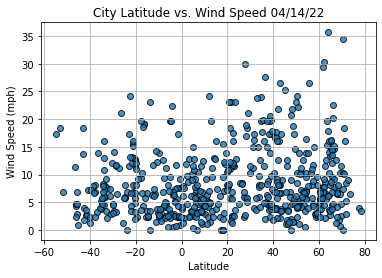

In [17]:
#build the scatter plots for latitude vs wind speed
plt.scatter(lts, wind_speed, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

#incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/Fig4.png")

plt.show()

In [25]:
#import linregress
from scipy.stats import linregress

#create a function to perform linear regression on the weather data
#and plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    #run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    #calculate the regression line "y-values" from the slope and intercept
    regress_values = x_values * slope + intercept
    #get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    #create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    #annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()

In [26]:
#create northern and southern hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

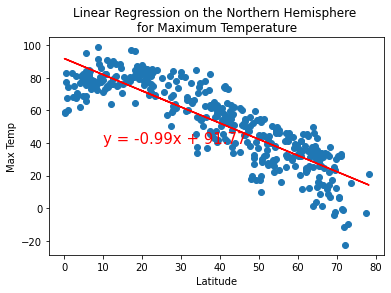

In [35]:
#linear regression on the Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Max Temp"]
#call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n"
                        "for Maximum Temperature", "Max Temp", (10,40))

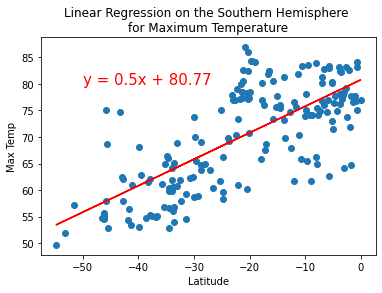

In [39]:
#linear regression on the Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Max Temp"]
#call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \n"
                        "for Maximum Temperature", "Max Temp", (-50,80))

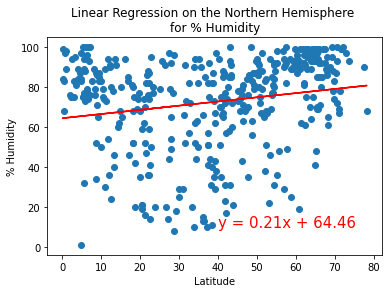

In [40]:
#linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
#call the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemisphere \n"
                      "for % Humidity", "% Humidity", (40,10))

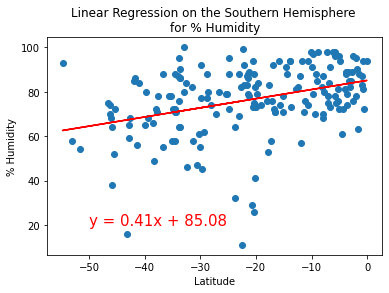

In [42]:
#linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
#call the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere \n"
                      "for % Humidity", "% Humidity", (-50, 20))

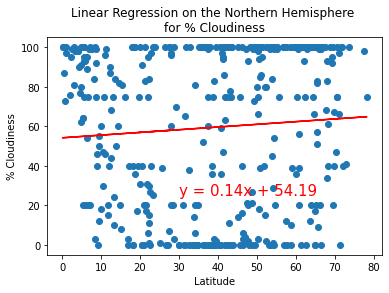

In [45]:
#linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
#call the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemisphere \n"
                      "for % Cloudiness", "% Cloudiness", (30,25))

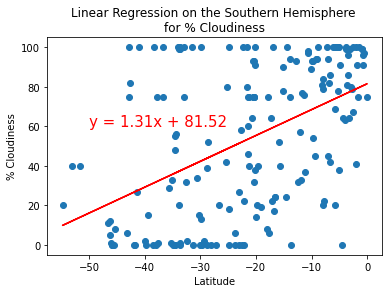

In [47]:
#linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
#call the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere \n"
                      "for % Cloudiness", "% Cloudiness", (-50, 60))

In [ ]:
#linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

#call the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemisphere \n"
                      "for Wind Speed", "Wind Speed", (10,35))

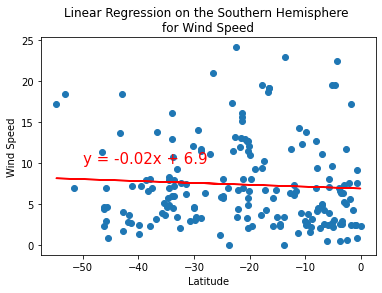

In [51]:
#linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

#call the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere \n"
                      "for Wind Speed", "Wind Speed", (-50,10))